In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from get_aq_data import get_flo_data, ID_to_name, annotate_boxplot

In [4]:
data, hourly_mean, daily_mean = get_flo_data()

In [5]:
all_site_daily_mean = daily_mean.mean(axis=1)

In [6]:
weekday_index = all_site_daily_mean[(all_site_daily_mean.index.dayofweek >= 0) & (all_site_daily_mean.index.dayofweek <= 4)].index
weekend_index = all_site_daily_mean[all_site_daily_mean.index.dayofweek >= 5].index

In [7]:
all_site_daily_mean = all_site_daily_mean.to_frame('Mean')

In [8]:
all_site_daily_mean.loc[weekday_index, 'Weekend'] = 'Weekday'
all_site_daily_mean.loc[weekend_index, 'Weekend'] = 'Weekend'

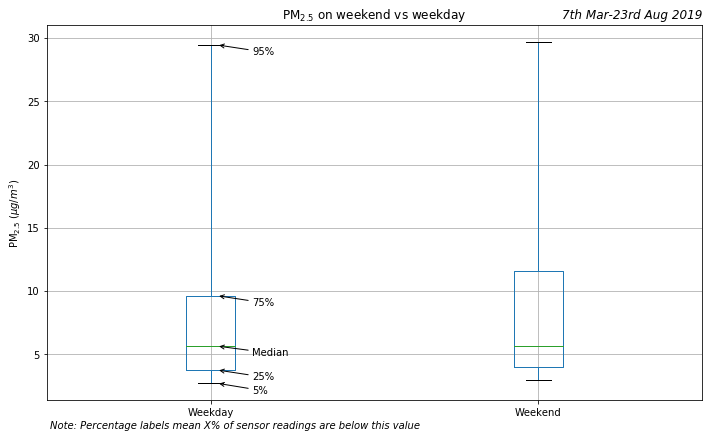

In [9]:
bpdict = all_site_daily_mean.boxplot(by='Weekend', showfliers=False, whis=[5, 95], figsize=(10,6), return_type='dict')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ on weekend vs weekday')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('')
plt.tight_layout()
plt.savefig('graphs/WeekendVsWeekday.png', dpi=300)
annotate_boxplot(bpdict['Mean'], x_offset=0.02, text_offset_y=-10)
plt.annotate("Note: Percentage labels mean X% of sensor readings are below this value",
              (0.07, 0.01), xycoords='figure fraction', fontstyle='italic')
plt.savefig('graphs/WeekendVsWeekday_Ann.png', dpi=300)

In [10]:
import seaborn as sns

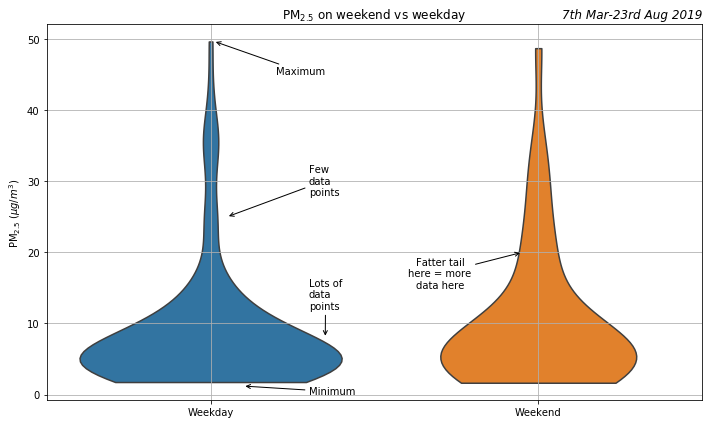

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Weekend', y='Mean', data=all_site_daily_mean, cut=0, inner=None)
plt.grid()
plt.xlabel('')
plt.title('$\mathrm{PM}_{2.5}$ on weekend vs weekday')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.annotate('Lots of\ndata\npoints', xy=(0.35, 8), xytext=(0.3, 12), arrowprops={'arrowstyle':'->'})
plt.annotate('Few\ndata\npoints', xy=(0.05, 25), xytext=(0.3, 28), arrowprops={'arrowstyle':'->'})
plt.annotate('Maximum', xy=(0.01, 49.7), xytext=(0.2, 45), arrowprops={'arrowstyle':'->'})
plt.annotate('Minimum', xy=(0.1, 1.2), xytext=(0.3, 0), arrowprops={'arrowstyle':'->'})
plt.annotate('Fatter tail\nhere = more\ndata here', xy=(0.95, 20), xytext=(0.7, 15), ha='center', arrowprops={'arrowstyle':'->'})
plt.tight_layout()
plt.savefig('graphs/WeekendVsWeekday_Violin.png', dpi=300)